## Arrival And Departure Delay Distributions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
flights = pd.read_csv('data/flights_cleaned.csv')
passengers = pd.read_csv('data/passengers_cleaned.csv')
fuel_consum = pd.read_csv('data/fuel_cleaned_2019_01.csv')

In [4]:
flights.columns

Index(['Unnamed: 0', 'fl_date', 'mkt_unique_carrier', 'branded_code_share',
       'mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance'],
      dtype='object')

### Arrival Delay

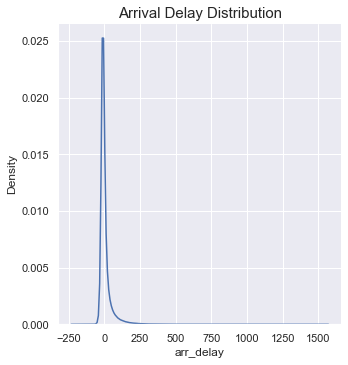

In [5]:
#arrival delay distribution
sns.set_theme(style="darkgrid")
sns.displot(flights, x="arr_delay",kind='kde')
plt.title("Arrival Delay Distribution", size=15)
plt.show()

### Departure Delay

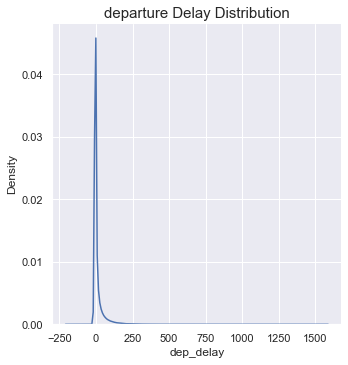

In [6]:
#departure delay
sns.set_theme(style="darkgrid")
sns.displot(flights, x="dep_delay",kind='kde')
plt.title("departure Delay Distribution", size=15)
plt.show()

## Removing The Outliers

### Using Scatter Plot

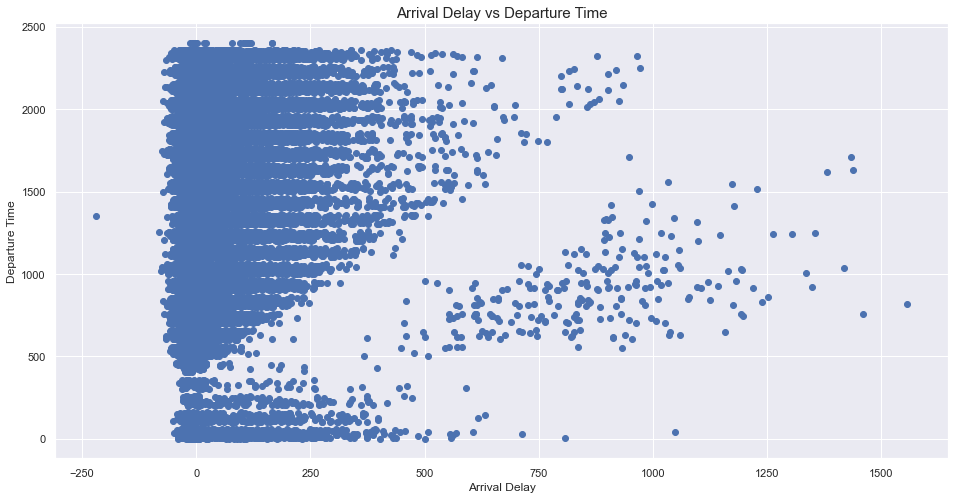

In [9]:
#Scatter plot of Arrival Delay
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(flights['arr_delay'], flights['dep_time'])
ax.set_xlabel('Arrival Delay')
ax.set_ylabel('Departure Time')
plt.title("Arrival Delay vs Departure Time", size=15)
plt.show()

In [76]:
#Removing the Outliers
flights_no_outlier = flights.loc[(flights['arr_delay'] <= 350)\
                                 & (flights['arr_delay'] >= -100)]
flights_no_outlier = flights_no_outlier.loc[(flights_no_outlier['dep_delay'] <=350)\
                                            & (flights_no_outlier['dep_delay'] >=-100)]

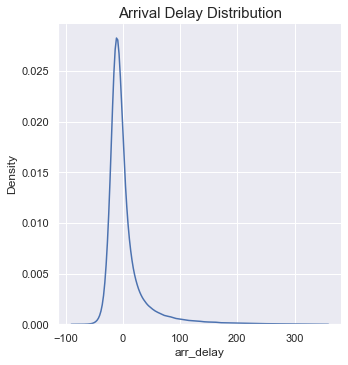

In [77]:
# Arrival Delay Distribution after excluding the outliers
sns.set_theme(style="darkgrid")
sns.displot(flights_no_outlier, x="arr_delay",kind='kde')
plt.title("Arrival Delay Distribution", size=15)
plt.show()

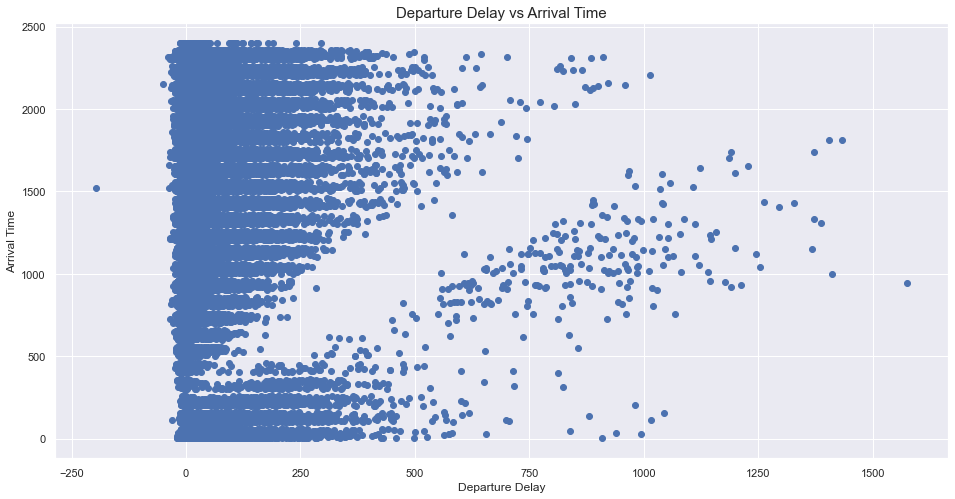

In [78]:
#Scatter plot of Departure Delay
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(flights['dep_delay'], flights['arr_time'])
ax.set_xlabel('Departure Delay')
ax.set_ylabel('Arrival Time')
plt.title("Departure Delay vs Arrival Time", size=15)
plt.show()

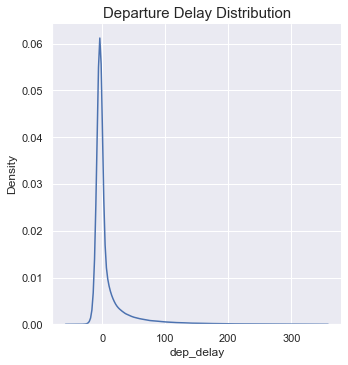

In [73]:
# Departure Delay Distribution after excluding the outliers
sns.set_theme(style="darkgrid")
sns.displot(flights_no_outlier, x="dep_delay",kind='kde')
plt.title("Departure Delay Distribution", size=15)
plt.show()

### Using IQR

In [100]:
#Remvoving outliers for Arrival
Q1_arrival = flights.arr_delay.quantile(0.25)
Q3_arrival = flights.arr_delay.quantile(0.75)
IQR_arrival = Q3_arrival - Q1_arrival
flights_no_outlier_iqr = flights.loc[(flights['arr_delay'] >= (Q1_arrival - 1.5*IQR))\
                                     & (flights['arr_delay'] <= Q3_arrival + 1.5*IQR)]

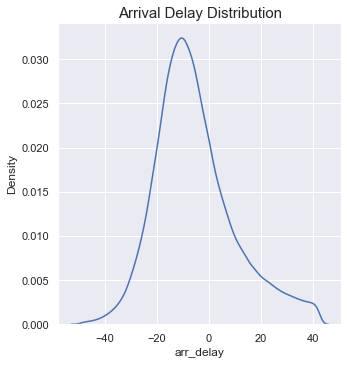

In [101]:
# Arrival Delay Distribution after excluding the outliers
sns.set_theme(style="darkgrid")
sns.displot(flights_no_outlier_iqr, x="arr_delay",kind='kde')
plt.title("Arrival Delay Distribution", size=15)
plt.show()

In [103]:
# Removing outliers for departure delay
Q1_dep = flights.dep_delay.quantile(0.25)
Q3_dep = flights.dep_delay.quantile(0.75)
IQR_dep = Q3_dep - Q1_dep
flights_no_outlier_iqr = flights.loc[(flights['dep_delay'] >= (Q1_dep - 1.5*IQR_dep))\
                                     & (flights['dep_delay'] <= Q3_dep + 1.5*IQR_dep)]

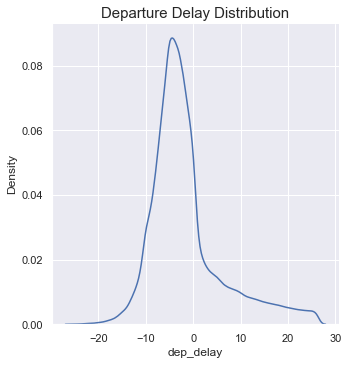

In [99]:
sns.set_theme(style="darkgrid")
sns.displot(flights_no_outlier_iqr, x="dep_delay",kind='kde')
plt.title("Departure Delay Distribution", size=15)
plt.show()